In [1]:
from eda_imports import *

In [2]:
import word2vec

In [3]:
%time model = word2vec.load('./PubMed-w2v.bin')

CPU times: user 1min 26s, sys: 2.36 s, total: 1min 28s
Wall time: 1min 30s


In [4]:
with open('/projects/btl/zxue/tasrkleat-TCGA-results/firebrowse-data/bulk_rsem/data/fb-rsem-genes.txt', 'rt') as inf:
    RSEM_GENES = inf.read().splitlines()

In [5]:
RSEM_GENES = list(sorted(set([_.split('|')[0] for _ in RSEM_GENES])))

In [6]:
model.vocab.shape

(2351706,)

In [7]:
model.vectors.shape

(2351706, 200)

In [98]:
indexes, metrics = model.cosine('CCND1', n=15)
nearby_tokens = model.vocab[indexes].tolist()
print(nearby_tokens)

['CCNE1', 'C-MYC', 'ERBB2', 'EMS1', 'CCND2', 'MYC', 'STK15', 'CKS1B', 'ala43thr', 'CTTN', 'CCND3', 'TOP2A', 'MDM-2', 'TP73', 'AURKA']


In [8]:
tokens = []
for k, g in enumerate(RSEM_GENES):
    try:
        indexes, metrics = model.cosine(g, n=15)
        nearby_tokens = model.vocab[indexes].tolist()
        tokens.extend(nearby_tokens)
    except:
        print(k, g, end=',')
#     if (k + 1) % 100 == 0:
#         print('{0} genes processed'.format(k + 1), end=',')

2 A1CF,4 A2LD1,8 A4GNT,12 AACSL,14 AADACL2,15 AADACL3,16 AADACL4,23 AARS2,24 AARSD1,25 AASDH,26 AASDHPPT,29 AATK,33 ABCA11P,36 ABCA17P,64 ABCC6P1,65 ABCC6P2,81 ABHD1,83 ABHD11,85 ABHD12B,86 ABHD13,87 ABHD14A,88 ABHD14B,89 ABHD15,91 ABHD3,95 ABHD8,104 ABLIM3,110 ABTB1,111 ABTB2,112 ACAA1,128 ACAP3,132 ACBD4,135 ACBD7,139 ACCN4,140 ACCN5,142 ACCSL,146 ACER1,157 ACOT11,159 ACOT13,162 ACOT6,165 ACOT9,168 ACOX3,174 ACPL2,181 ACSBG1,183 ACSF2,191 ACSM2A,192 ACSM2B,194 ACSM4,195 ACSM5,198 ACSS3,202 ACTBL2,206 ACTL6A,207 ACTL6B,210 ACTL8,211 ACTL9,216 ACTR10,217 ACTR1A,218 ACTR1B,220 ACTR3,221 ACTR3B,222 ACTR3C,223 ACTR5,224 ACTR6,225 ACTR8,226 ACTRT1,227 ACTRT2,230 ACVR1C,236 ACYP1,239 ADAD1,240 ADAD2,247 ADAM18,250 ADAM20,252 ADAM21P1,257 ADAM30,260 ADAM3A,261 ADAM5P,286 ADAMTSL1,292 ADAP2,297 ADAT2,298 ADAT3,300 ADCK1,301 ADCK2,302 ADCK4,303 ADCK5,308 ADCY4,326 ADHFE1,328 ADIG,344 ADPRHL1,345 ADPRHL2,360 ADSSL1,367 AFAP1L2,368 AFARP1,378 AFTPH,382 AGAP11,385 AGAP4,386 AGAP5,387 AGAP6,388 AG

In [11]:
uniq_tokens = set(tokens)

In [25]:
len(uniq_tokens)

60171

In [12]:
X = model.vectors

In [26]:
X.shape

(2351706, 200)

In [14]:
df_X = pd.DataFrame(X)

In [15]:
df_X.set_index(model.vocab, inplace=True)

In [16]:
sub_X = df_X.loc[uniq_tokens]

In [17]:
sub_X.shape

(60171, 200)

In [24]:
sub_X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
Cybr,-0.061612,0.095615,-0.005478,-0.015910,-0.180024,0.054115,-0.164356,-0.246087,0.056978,-0.130875,0.036547,0.147299,-0.011346,0.084238,-0.145400,-0.087277,0.035406,0.025986,0.103105,0.038384,0.095616,0.023012,0.021962,0.009767,-0.023460,0.052753,0.148353,0.029193,-0.069088,0.163638,0.074869,0.068252,0.107490,-0.047288,-0.068058,0.016623,-0.186802,0.020315,-0.099522,0.000418,0.019510,0.030264,0.035760,-0.018449,0.034051,-0.096827,-0.069680,-0.025416,-0.036834,0.070239,-0.015143,0.010888,0.014548,0.137387,-0.009423,0.051791,0.070490,0.095029,-0.004953,-0.037469,0.092653,0.016873,0.017910,0.019127,-0.012132,0.045575,-0.054442,-0.116645,-0.067732,0.000647,-0.055802,0.009945,-0.005576,0.056324,0.047293,0.011907,-0.051767,0.090461,-0.000983,-0.001946,-0.010553,0.050799,-0.093685,-0.024851,0.130305,-0.008148,-0.051656,0.019949,-0.018596,0.011758,-0.069304,0.048202,0.029069,-0.100028,-0.130621,-0.009183,-0.090375,-0.059303,-0.079847,-0.225222,-0.038792,0.064869,-0.003121,0.056704,-0.066716,-0.073708,-0.070433,0.005427,0.025922,0.025131,0.029013,0.075686,0.057894,-0.070446,0.043412,-0.066156,0.054643,0.068068,-0.036348,0.032966,-0.009796,0.011724,0.144744,-0.023422,-0.008927,0.054227,0.025899,-0.094546,-0.080856,0.025561,0.024076,-0.031853,0.058568,0.030415,-0.055317,-0.041427,-0.020872,0.011477,0.021419,-0.090772,0.025461,-0.060111,0.021199,-0.136110,-0.006413,0.005449,-0.060312,-0.006785,0.017590,0.035999,0.029857,0.038652,-0.168465,-0.016503,-0.022190,-0.066735,0.045706,0.069371,-0.114099,0.029942,0.055979,-0.106475,0.007071,0.140250,0.052774,-0.019840,0.098263,0.018550,-0.011674,-0.077822,-0.012197,0.047125,-0.032323,0.068489,0.094179,0.024471,0.017573,0.039289,-0.060097,-0.044407,-0.030848,-0.079826,0.011621,0.064543,-0.100232,0.046779,-0.094221,-0.045640,-0.094028,-0.036689,0.150349,-0.048511,-0.077059,0.042476,-0.047211,-0.037932,-0.101257,-0.029321,-0.042529,0.010601
V1bR,-0.045931,0.000361,-0.001950,-0.020050,-0.113710,-0.006749,-0.133885,-0.146804,0.017125,-0.164794,0.033884,0.057792,-0.025189,0.119095,-0.023659,-0.019247,-0.096240,-0.106025,0.089323,0.088389,-0.112811,-0.096787,-0.001600,-0.040459,-0.069788,0.029086,0.059665,0.003022,0.004963,0.005620,0.089538,-0.032301,0.020206,-0.073054,-0.117804,-0.049215,-0.064533,0.047420,-0.057761,0.110754,-0.018764,0.060455,0.079032,-0.036324,-0.021733,-0.040827,0.010182,-0.031143,-0.046542,0.138117,-0.108980,0.087607,-0.001436,0.077800,-0.076261,0.070967,0.058085,0.023723,0.005622,-0.014444,0.024424,0.026321,-0.052539,-0.061811,-0.085611,-0.032825,-0.034269,0.038670,-0.035586,-0.046098,-0.006288,-0.079945,0.251549,0.036039,0.047767,-0.056107,-0.021683,0.117166,0.040963,0.003913,-0.093656,-0.060308,0.023218,-0.062553,0.051590,0.071159,-0.023314,0.074059,-0.047794,-0.056614,0.016366,-0.014623,-0.076602,-0.148568,-0.100540,0.009957,-0.060846,0.000793,-0.096636,-0.069402,-0.048963,-0.037799,-0.003526,0.017701,-0.026998,0.016648,-0.051583,-0.052222,0.035265,0.059516,0.038836,-0.097156,0.062567,0.016929,0.025279,-0.113420,-0.061720,-0.036394,-0.154884,-0.035193,-0.005796,-0.081131,0.076239,0.047674,0.013514,-0.001549,-0.048149,-0.152234,0.037013,0.057312,0.028209,0.009175,-0.005277,0.073755,0.019373,-0.096373,0.006811,-0.004554,-0.070718,-0.167736,-0.036649,-0.029685,0.025376,-0.049197,-0.009733,0.033458,0.0

In [19]:
X_reduced = sub_X.values

In [20]:
X_reduced.shape

(60171, 200)

In [21]:
random_state = np.random.randint(0, 1e9)
print('random_state: {0}'.format(random_state))
%time X_embedded = TSNE(n_components=2, perplexity=50, learning_rate=20000, random_state=random_state, metric='cosine', verbose=True).fit_transform(X_reduced)

random_state: 540861931
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 60171
[t-SNE] Computed conditional probabilities for sample 2000 / 60171
[t-SNE] Computed conditional probabilities for sample 3000 / 60171
[t-SNE] Computed conditional probabilities for sample 4000 / 60171
[t-SNE] Computed conditional probabilities for sample 5000 / 60171
[t-SNE] Computed conditional probabilities for sample 6000 / 60171
[t-SNE] Computed conditional probabilities for sample 7000 / 60171
[t-SNE] Computed conditional probabilities for sample 8000 / 60171
[t-SNE] Computed conditional probabilities for sample 9000 / 60171
[t-SNE] Computed conditional probabilities for sample 10000 / 60171
[t-SNE] Computed conditional probabilities for sample 11000 / 60171
[t-SNE] Computed conditional probabilities for sample 12000 / 60171
[t-SNE] Computed conditional probabilities for sample 13000 / 60171
[t-SNE] Computed c

In [27]:
X_embedded.shape

(60171, 2)

In [28]:
df_em = pd.DataFrame(X_embedded, columns=['x', 'y'])

In [29]:
df_em['token'] = sub_X.index.values

In [58]:
# df_em.to_pickle('./60171_gene_related_tokens.pkl')
df_em.sort_values('token').to_csv('./60171_gene_related_tokens.csv', index=False)

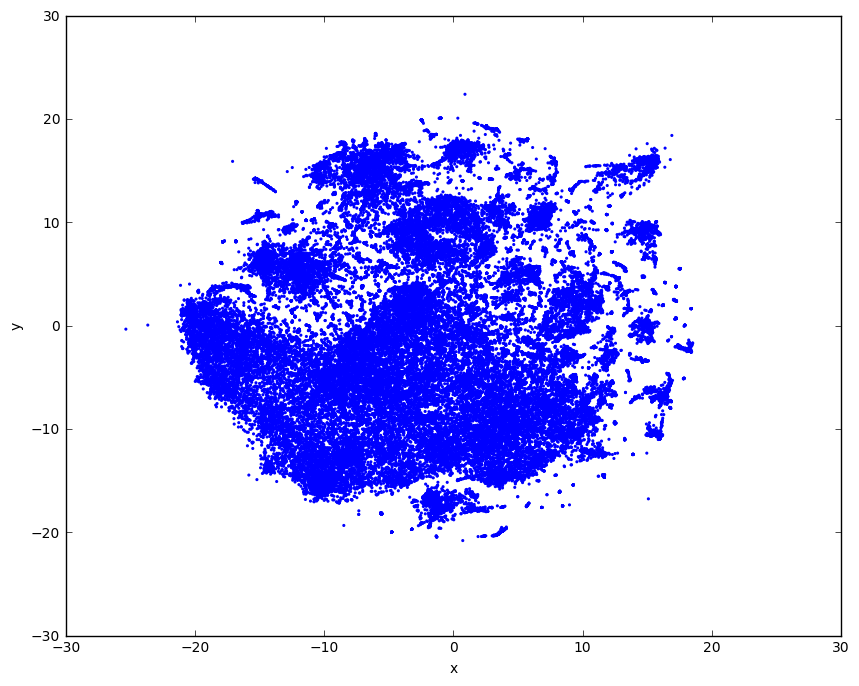

In [31]:
df_em.plot.scatter(x='x', y='y', s=5, edgecolor='none')

In [88]:
gene = 'CCND1'
center = df_em.query('token == "{0}"'.format(gene))
center

,x,y,token
14340,10.226823,-7.471659,CCND1


In [89]:
x = center.x.values[0]
y = center.y.values[0]

In [90]:
# x = 5.25
# y = 4.3
radius = 1

In [91]:
df_plot = df_em.query('{0} < x < {1}'.format(x - radius, x + radius)).query('{0} < y < {1}'.format(y - radius, y + radius))

In [100]:
df_plot.sort_values('token').to_csv('./genes/{0}.csv'.format(gene), index=False)

In [137]:
# HNSC
genes = 'MOBKL3, CSGALNACT2, RAB3C, WDR82, ANXA9, KIF14, BMPR1B, SLC43A3, ATP7B, FXC1, ZBTB7B, HECTD1, CENPQ, PQLC2, ASPG, C20orf72, NEBL, LOC148709, FAM170B, ALAD, MAB21L2, TRAM2, TSGA10, NEK5, FAM74A4, SI, MGC12982, CYP4F3, KRT36, MTF2, DLX1, SERTAD1, ZNF563, DAPP1, SAA2, KLK5, ZNF319'
# PRAD
genes = 'PPP1R3C, SDHD, APOBEC3C, SATL1, INSIG1, RHOT1, INSRR, LOC441089, LOC440563, FTHL3, KLHL4, COL17A1, OR52L1, SCGB1A1, FDFT1, CSRNP3, FAM83B, NSDHL, COL7A1, PHYHIPL, C3orf49, FAM74A1, ZNF750, TBC1D28, CER1, LRP1, HSPA1A, C13orf26, ASB3, DMBT1, CRABP2, HCN4, VN1R2'
# STAD
genes = 'HPCAL4, GCOM1, PPP1R1A, HADH, CBR1, DPT, FAM19A4, LYVE1, UGT1A7, AMPD1'
# THCA
genes = 'CDH2, DCAF11, ZNF829, MDS2, COL4A1, NDRG1, HNRNPA3P1, ZNF831, EMD, SHANK3, DLG2, SLC20A2, CELA1, LAYN, CYTSA, PDGFC'
genes = genes.split(', ')
hotspots = df_em.query('token in {0}'.format(genes))
print('looking for {0} genes, but only {1} are available in the corpus'.format(len(genes), hotspots.shape[0]))
dfs = []
radius = 1
for key, row in hotspots.iterrows():
    x = row.x
    y = row.y
    _df = df_em\
        .query('{0} < x < {1}'.format(x - radius, x + radius))\
        .query('{0} < y < {1}'.format(y - radius, y + radius))
#     _df = row.to_frame().T
    dfs.append(_df)
df_plot = pd.concat(dfs)
df_plot['color'] = df_plot.token.apply(lambda s: 'red' if s in genes else 'blue')

looking for 16 genes, but only 7 are available in the corpus


In [138]:
df_plot.sort_values('token').to_csv('./genes.csv'.format(gene), index=False)

In [134]:
# ax = df_plot.plot.scatter(x='x', y='y', s=5, edgecolor='none')
# for k, row in df_plot.iterrows():
#     if row.token == 'TP53':
#         ax.text(row.x, row.y, row.token, color='red')
#     else:
#         ax.text(row.x, row.y, row.token, color='black')

In [51]:
indexes, metrics = model.cosine('blackberries')
print(model.vocab[indexes].tolist())

['gooseberries', 'elderberries', 'blueberries', 'strawberries', 'plums', 'currants', 'blackcurrants', 'raspberries', 'cloudberries', 'cherries']


In [59]:
indexes, metrics = model.cosine('Einstein')
print(model.vocab[indexes].tolist())

['Schweitzer', 'Szent-Gyorgyi', 'Maxwell', 'Clerk', 'Yeshiva', 'Albert', 'Trouton', 'Jacobi', 'Devonshire', 'Buckingham']


In [72]:
indexes, metrics = model.cosine('TCGA', n=15)
print(model.vocab[indexes].tolist())

['BDGP', 'DataBase', 'IRGSP', 'MSigDB', 'SeattleSNPs', 'ENCODE', 'HGDP-CEPH', 'IASLC', 'IALSC', 'Atlas', 'HapMap', 'PEDB', 'SNP500Cancer', 'ICPCG', 'PCaP']
